Agnaldo Nunes de Oliveira - <strong>11221946</strong>

Gustavo Santos Morais - <strong>11221932</strong>

Matheus Barbosa Silva - <strong>11221741</strong>
***
<font size="5"> <strong>EP1 - MAC0209 - Modelagem e Simulação de EDOs</strong> </font>
***
O movimento de queda livre consiste em um ponto que cai de uma altura $h$, com aceleração $-g$, onde $g$ é a aceleração da gravidade e a aceleração da partícula tem sinal oposto pois sua velocidade tem sentido contrário ao sentido do eixo $y$.
O movimento acontece apenas no eixo $y$.<br/>
O ponto começa com uma velocidade inicial nula, e aumenta a sua velocidade apenas sobre influência da aceleração $-g$.

# Preâmbulo

In [0]:
#QUEDA LIVRE
import matplotlib.pyplot as pyplot
from matplotlib import collections as mc
import os
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML
import random
import requests
import os
from io import BytesIO


# Modelagem e Análise Gráfica

Para calcular a posição do ponto analiticamente, supomos velocidade inicial igual a 0, e calculamos a sua posição depois de cair de uma altura $h$ (aqui representado como params[2] -> altura inicial) com uma aceleração $-g$, depois de t instantes de tempo, seja, $y(t) = h + (\frac{-g t^2}{2})$.<br/>
Para calcular a posição do ponto por Euler, usando o algoritmo ensinado em aula, teremos que $y_{next} = y_{ant} + (v\Delta t) \implies y_{next} = y_{ant} + ((-gt)\Delta t)$.


In [0]:
def nextYeuler(y, t, dt, params):
  return (y + params[0]*t*dt)

def nextYanalytical(t, params):
  return (params[2] + (params[0]*t*t)/2)

Para calcular a velocidade analiticamente, multiplicamos a aceleração pelos instantes de tempo, uma vez que a velocidade do ponto dependerá apenas dessa aceleração. Ou seja, $v = -gt$.<br/>
Para calcular a velocidade por Euler, usando o algoritmo ensinado em aula, temos que $nextV = vAnt + (a\Delta t) \implies nextV = vAnt + (-g\Delta t)$.

In [0]:
def nextVeuler(v, dt, params):
  return params[0]*dt + v

def nextVanalytical(t, params):
  return params[0]*t

Erro (Y):  0.0
Erro (V):  0.0
Erro (Y):  -0.0490332499998658
Erro (V):  0.0
Erro (Y):  -0.09806649999995898
Erro (V):  0.0
Erro (Y):  -0.14709975000005215
Erro (V):  4.440892098500626e-16
Erro (Y):  -0.19613300000014533
Erro (V):  0.0
Erro (Y):  -0.24516625000001113
Erro (V):  0.0
Erro (Y):  -0.2941995000001043
Erro (V):  0.0
Erro (Y):  -0.3432327499999701
Erro (V):  -8.881784197001252e-16
Erro (Y):  -0.3922659999998359
Erro (V):  -8.881784197001252e-16
Erro (Y):  -0.4412992499999291
Erro (V):  0.0
Erro (Y):  -0.49033250000002226
Erro (V):  -1.7763568394002505e-15
Erro (Y):  -0.5393657500001154
Erro (V):  -1.7763568394002505e-15
Erro (Y):  -0.5883989999999812
Erro (V):  0.0
Erro (Y):  -0.637432249999847
Erro (V):  0.0
Erro (Y):  -0.6864654999999402
Erro (V):  0.0
Erro (Y):  -0.7354987500000334
Erro (V):  1.7763568394002505e-15
Erro (Y):  -0.7845320000001266
Erro (V):  1.7763568394002505e-15
Erro (Y):  -0.8335652499999924
Erro (V):  3.552713678800501e-15
Erro (Y):  -0.8825985000000856
E

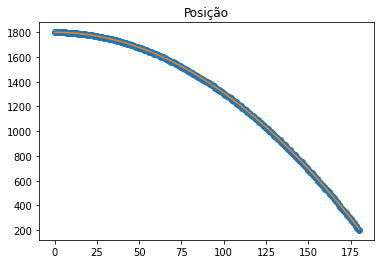

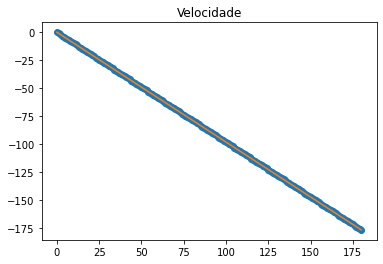

In [14]:
g = 9.80665
t = 0
dt = 0.1
a = -g
v = 0
tf = 18
y = 1800
params = [a, v, y]
vYe = []
vYa = []
vVe = []
vVa = []
while (t < tf):
  vYa.append(nextYanalytical(t, params))
  vVa.append(nextVanalytical(t, params))
  vYe.append(y)
  vVe.append(v)
  print('Erro (Y): ', y - nextYanalytical(t,params))
  print('Erro (V): ', v - nextVanalytical(t,params))
  t += dt
  y = nextYeuler(y, t, dt, params)
  v = nextVeuler(v, dt, params)
pyplot.figure(0)
pyplot.plot(vYe,label='Euler',linestyle='',marker='o') 
pyplot.plot(vYa,label='Analítico') 
pyplot.title('Posição')
pyplot.show(block=False)

pyplot.figure(1)
pyplot.plot(vVe,label='Euler',linestyle='',marker='o') 
pyplot.plot(vVa,label='Analítico') 
pyplot.title('Velocidade')
pyplot.show(block=False)

# Animação

Para a animação, usamos o código mostrado em aula como base. As mudanças feitas foram:
<ul>
  <li>O link para a imagem;</li>
  <li>Os vetores usados para simular o movimento, que nesse caso são os vetores com os valores dos pontos em $y$, em função do tempo (vYa e vYe).</li>
</ul>
<p>Também foi preciso inverter o sentido do gráfico que envolve a imagem, pois a origem fica, por padrão, na parte de cima - o que faria que a queda livre subisse, em vez de descer. Dessa forma, invertemos o eixo para que a simulação ficasse de acordo com as expectativas (como invertemos o eixo, precisamos inverter a imagem também, para ambos terem o mesmo sentido).</p>

In [15]:
x = list(np.ones((len(vYa),1)) * 75)

#plt.close()

xAnim = x
yAnim = vYa

def initAnimate():
  line0.set_data([], [])
  line1.set_data([], [])
  return (line0, line1)

def loadImage():
  imgurl='https://i.pinimg.com/originals/8e/45/de/8e45dedff18741341ebfa265cef1710b.png'
  img = pyplot.imread(BytesIO(requests.get(imgurl).content))
  img = np.flipud(img)
  return(img)

# animation function. This is called sequentially  
def animate(i):
    ind0 = i%len(yAnim)
    ind1 = ind0
    
    line0.set_data([xAnim[ind0], xAnim[ind1]] , [yAnim[ind0], yAnim[ind1]])
    line1.set_data([xAnim[ind0], xAnim[ind1]] , [vYe[ind0], vYe[ind1]])
    return (line0, line1)

def createAnimPlot(yAnim):
    img = loadImage()
    plotSizeK=1

    figAnim, ayAnim = pyplot.subplots(1, 2, figsize = (plotSizeK*12, plotSizeK*6))
    ayAnim[0].imshow(img, origin = 'lower', extent=[0, 1000, 0, 2000])
    ayAnim[1].imshow(img, origin = 'lower', extent=[0, 1000, 0, 2000])

    ayAnim[0].set_title("Solução Analítica")
    ayAnim[1].set_title("Solução por Euler")
    
    line0, = ayAnim[0].plot([], [], 'r-*', lw=5)
    line1, = ayAnim[1].plot([], [], 'r-*', lw=5)
    nFrames=len(yAnim)-1
    
    return(figAnim, ayAnim, nFrames, line0, line1)

figAnim, ayAnim, nFrames, line0, line1 = createAnimPlot(yAnim)

anim = animation.FuncAnimation(figAnim, animate, init_func=initAnimate,
                            frames=nFrames, interval=1000, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')

anim

Output hidden; open in https://colab.research.google.com to view.